# Similarités entre séries

#### - recherche d'une mesure de similarité pertinente

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import wordpunct_tokenize
import seaborn as sns
#using https://github.com/amueller/word_cloud
from wordcloud import WordCloud

from utils.load_data import getMostImportantSeries

plt.style.use('seaborn-white')
%matplotlib inline

#dataset path
path = "dataset"

Reprenons notre liste de séries célèbres, étoffée cette fois-ci: la liste contient **42 séries de plusieurs genres différents**.

In [8]:
series = ["2567_House", "2956_Criminal_Minds", "1262_Lost", "175_The_Walking_Dead", "76_Breaking_Bad", "196_Smallville",
"217_Game_of_Thrones", "1906_The_Vampire_Diaries", "3280_Peaky_Blinders", "1704_Rick_and_Morty", "1039_Narcos",
              "1845_Sherlock_(2010)", "1701_Outlander", "3314_Shameless", "818_Gomorra_(2014)", "413_Dexter",
              "2123_Sense8", "121_Suits", "2469_The_Simpsons", "1718_South_Park", "3259_Stargate_SG-1",
         "3012_Grey_s_Anatomy", "1910_NCIS", "95_How_I_Met_Your_Mother", "2556_The_Big_Bang_Theory",
         "884_The_X-Files", "2120_Doctor_Who_(1963)", "25_Friends", "207_Bones", "1830_CSI__Miami",
         "1041_CSI__Crime_Scene_Investigation", "381_Star_Trek__The_Next_Generation",
         "2091_Star_Trek__Deep_Space_Nine", "2936_Desperate_Housewives", "2053_Charmed",
         "186_Doctor_Who", "384_Twilight_Zone", "2733_NCIS__Los_Angeles", "292_Modern_Family",
         "2261_Buffy_The_Vampire_Slayer", "345_Dallas", "1641_Pretty_Little_Liars"]

In [9]:
sousliste = ["2956_Criminal_Minds", "2733_NCIS__Los_Angeles", "1041_CSI__Crime_Scene_Investigation",
            "2123_Sense8", "121_Suits", "345_Dallas",
            "381_Star_Trek__The_Next_Generation", "884_The_X-Files", "186_Doctor_Who"]

In [39]:
corpus = []

for serie in series:
    listepisodes = glob.glob(path+"/"+serie+"/*/*.tokens")
    text = ""
    for episode in listepisodes:
        with open(episode, "r", encoding="utf-8") as file:
            text += " " + file.read()
    corpus.append(text)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=1000)
x = tfidf_vect.fit(corpus)
vec = tfidf_vect.transform(corpus)

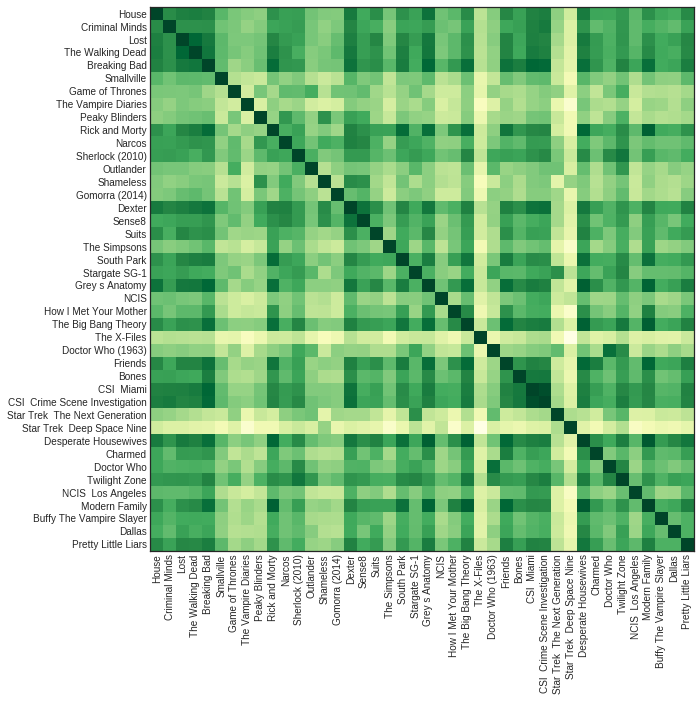

In [41]:
sim = np.zeros((len(series), len(series)))

for i in range(len(corpus)):
    for j in range(len(corpus)):
        dot = np.asscalar(vec[i].dot(vec[j].T).todense())
        norm1 = np.asscalar(vec[i].dot(vec[i].T).todense())
        norm2 = np.asscalar(vec[j].dot(vec[j].T).todense())  
        sim[i][j] += dot/(norm1 * norm2) #sim cosinus

plt.figure(figsize=(10,10))
plt.imshow(sim, cmap='YlGn', interpolation='nearest')
plt.xticks(range(len(corpus)), [" ".join(x.split("_")[1:]) for x in series], rotation='vertical')
plt.yticks(range(len(corpus)), [" ".join(x.split("_")[1:]) for x in series])
plt.show()

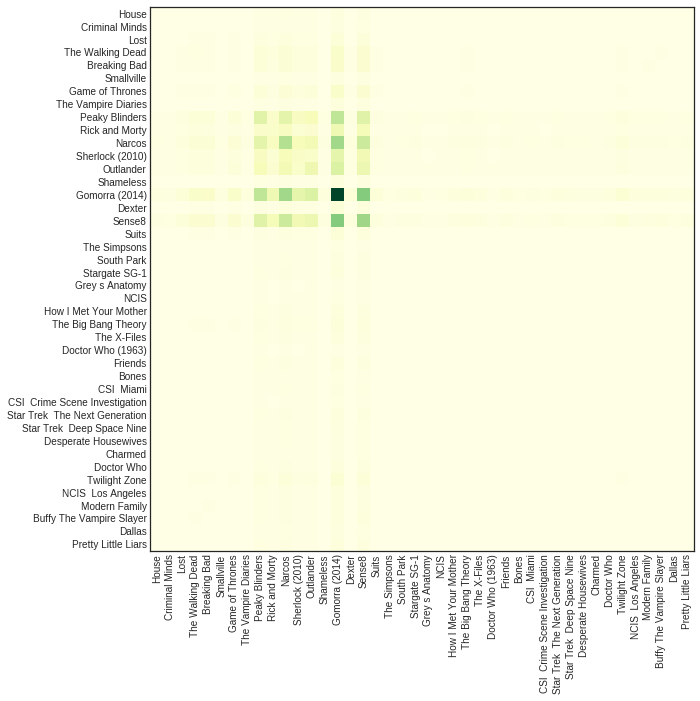

In [32]:
counter_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
x = counter_vect.fit(corpus)

vec = counter_vect.transform(corpus)

sim = np.zeros((len(series), len(series)))

for i in range(len(corpus)):
    for j in range(len(corpus)):
        dot = np.asscalar(vec[i].dot(vec[j].T).todense())
        norm1 = np.asscalar(vec[i].dot(vec[i].T).todense())
        norm2 = np.asscalar(vec[j].dot(vec[j].T).todense())  
        sim[i][j] += dot/(norm1 * norm2) #sim cosinus

plt.figure(figsize=(10,10))
plt.imshow(sim, cmap='YlGn', interpolation='nearest')
plt.xticks(range(len(corpus)), [" ".join(x.split("_")[1:]) for x in series], rotation='vertical')
plt.yticks(range(len(corpus)), [" ".join(x.split("_")[1:]) for x in series])
plt.show()